## Load Dataset & Analysis (iris)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

## Import Decision Tree Classifier
docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

In [3]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## Visualize Tree

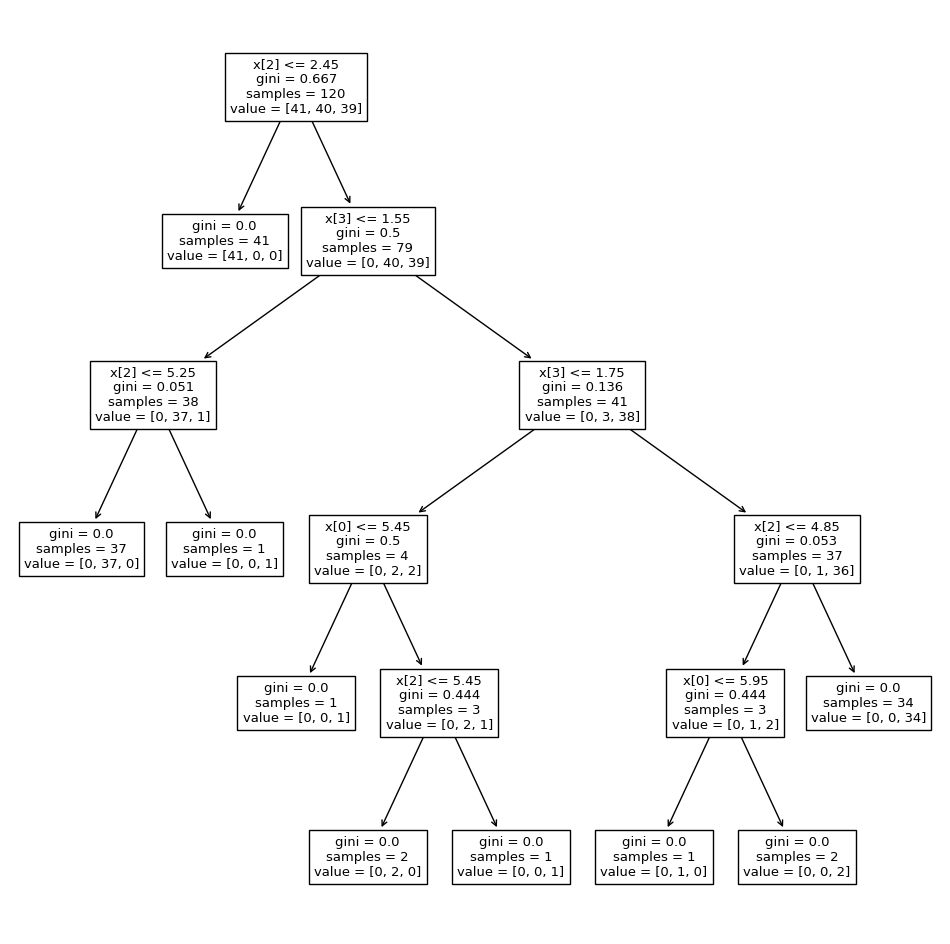

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,12)) 
tree.plot_tree(dt_clf)
plt.show()

## Visualize Feature Importance

Feature Importances:
[0.025 0.    0.555 0.42 ]

sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


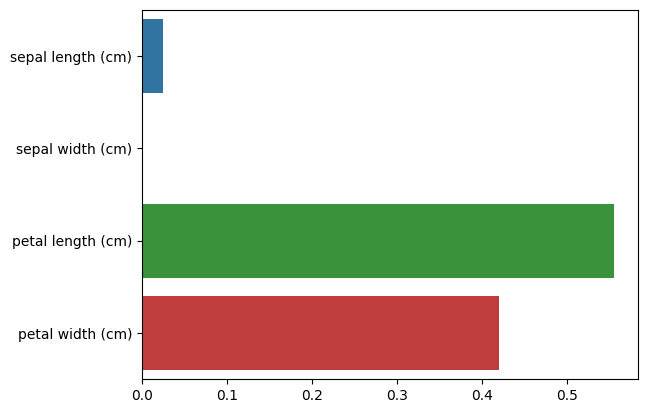

In [5]:
import seaborn as sns
import numpy as np

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
plt.show()

## Visualize Classification Result

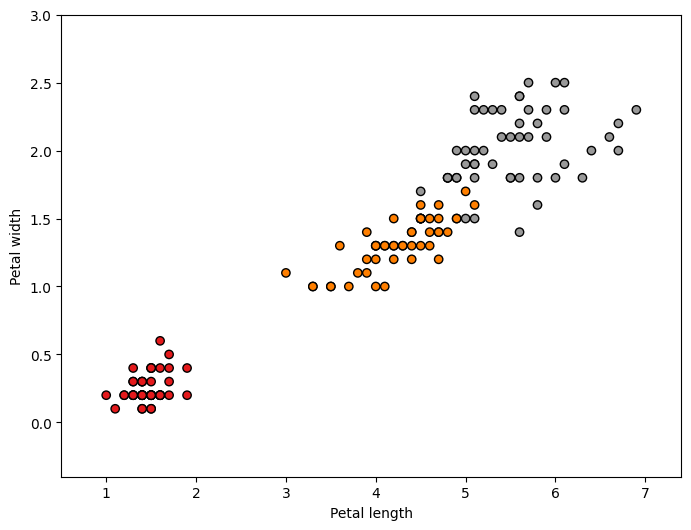

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

## Difference Between max_depth
* 여러 파라미터를 실험하기 위하여 파라미터를 변경하며 성능 실험 진행하기

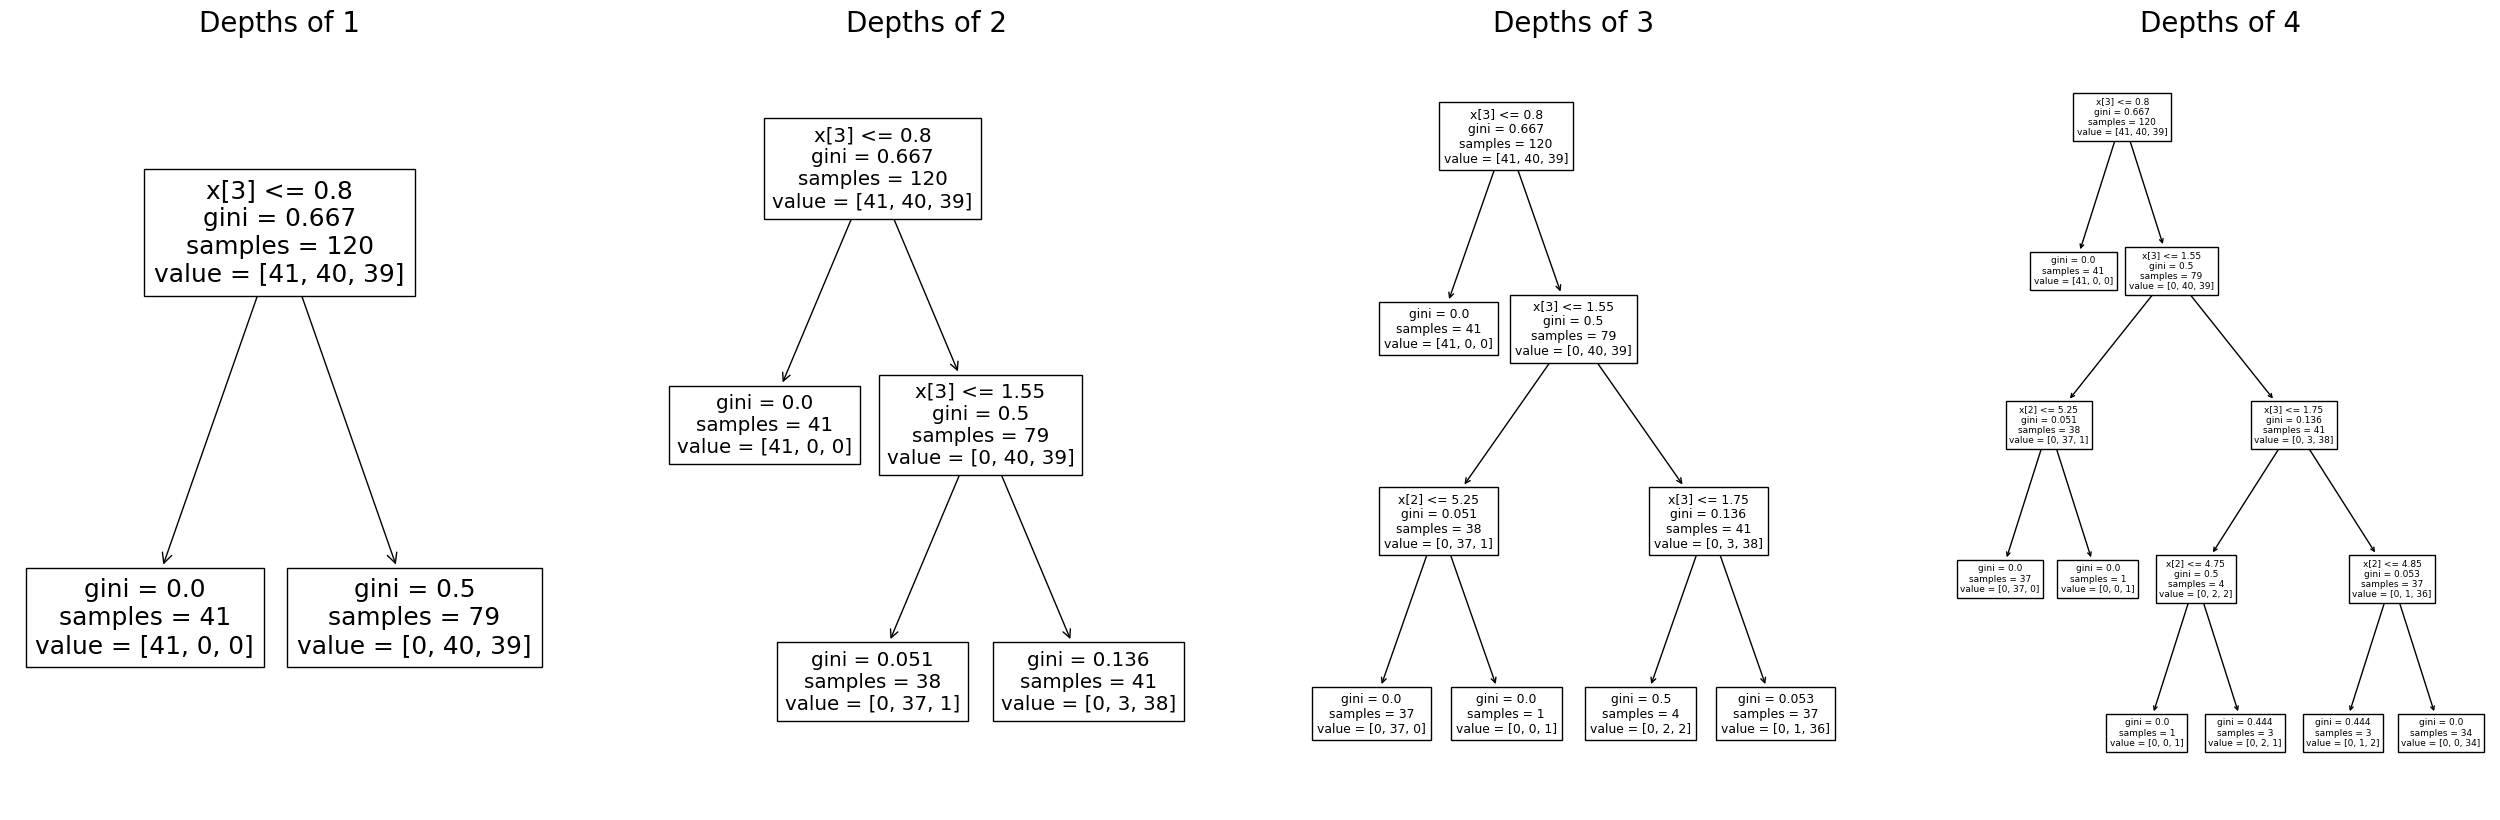

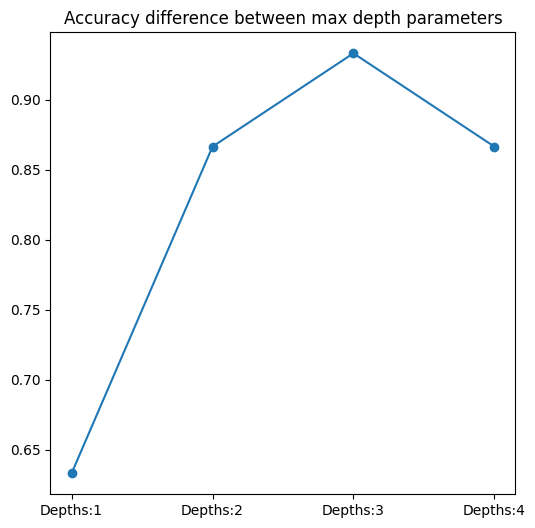

In [7]:
from sklearn import tree
plt.figure(figsize=(32, 10)) 

accuracy_scores = []

from sklearn.metrics import accuracy_score
for i in range(1, 5):
    dt_clf = DecisionTreeClassifier(max_depth = i, random_state=10)
    dt_clf.fit(X_train, y_train)
    plt.subplot(1, 4, i)
    tree.plot_tree(dt_clf)
    plt.title(f'Depths of {i}', fontsize=20)
    y_pred = dt_clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 6)) 
plt.plot([f"Depths:{i}" for i in range(1,5)], accuracy_scores, marker='o')
plt.title("Accuracy difference between max depth parameters")
plt.show()

## Random Forest Classifier
> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

> 디시전 트리 여러개를 통해 데이터셋을 서브 샘플링하고 앙상블링 하는 기법 (앙상블: 여러개의 classifier를 조합하여 성능을 올리는 기법)

* criterion = {“gini”, “entropy”}
* max_depth = maximun depth
* n_estimators: the number of trees in the forests

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Feature importance based on mean decrease in impurity
자료 출처: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


### What is MDI (Mean Decrease in Impurity)
* Gini Importance Score와 동일한 뜻으로, 전체적으로 Classification의 불순도를 얼마나 감소 시키는지를 의미한다.

In [9]:
# Random Forest Classifier로부터 중요 피쳐 추출
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# np.std: standard deviation (표준편차)

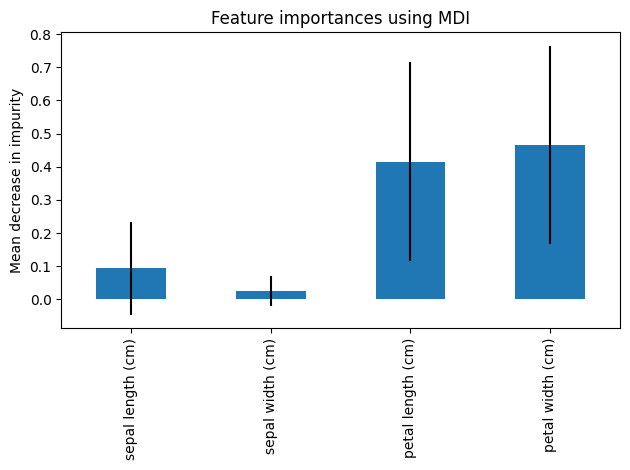

In [10]:
import pandas as pd

forest_importances = pd.Series(importances, index=iris_data.feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
# 위의 결과와 비슷한 결과를 도출할 수 있음.

## XGBoost Classifier

> **Boosting**: 앙상블 기법 중 하나로, 정확도가 높지 않은 약한 모델들을 연속적으로 이어붙여 결과를 점진적으로 개선하는 방법

> **XGBoost**: 오류 데이터에 경사 하강법을 사용해 가중치를 부여하면서 오류를 개선하는 모델, 느리고 overfitting의 위험성이 있는 gradiant boosting의 단점 보완

> XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.

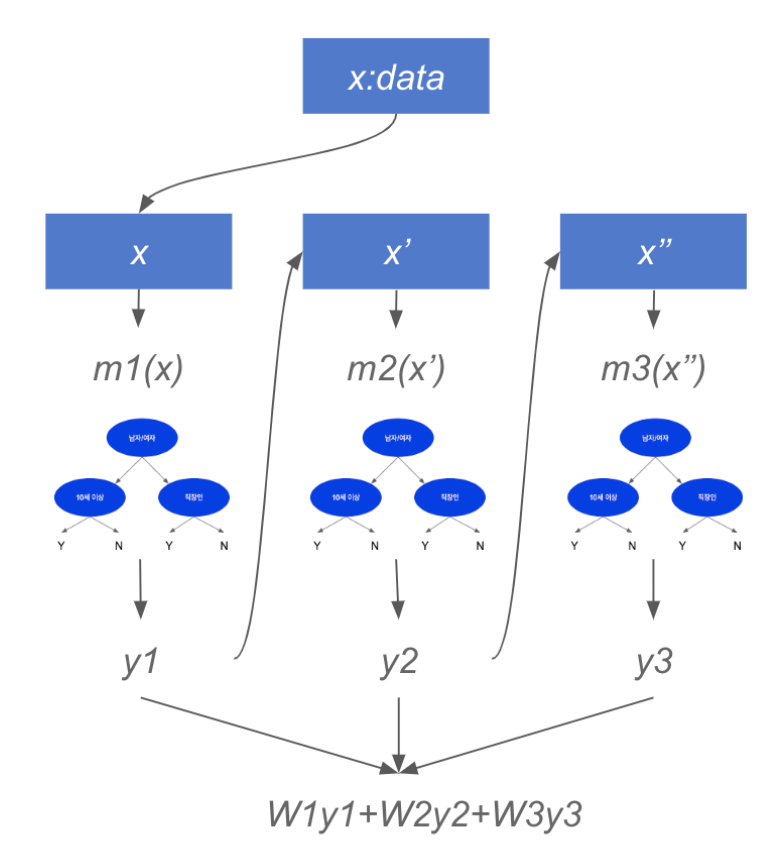


### XGB 참고 사이트
- https://xgboost.readthedocs.io/en/stable/python/index.html
- https://zephyrus1111.tistory.com/232


In [11]:
## sklearn에서는 xgboost를 제공하지 않으므로 직접 설치

! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# 실습과제

1. sklearn의 breast cancer dataset을 불러오세요.
3. XGBoost Classifier를 학습시키고, classification report를 출력하세요. 이때, 아래 사이트의 parameter를 참고해서 2가지 이상의 parameter를 튜닝 하세요. (ex. learning_rate, max_depth, n_estimators, ect...)
- https://xgboost.readthedocs.io/en/latest/parameter.html

In [17]:
# 런타임 초기화 후 실행
from sklearn.datasets import load_breast_cancer
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

cancer = load_breast_cancer() 

data = cancer["data"] 
target = cancer["target"] 
feature_name = cancer["feature_names"]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=11)

In [26]:
n_estimators = [2,3,4,5,6]
learning_rate = [0.01, 0.1, 0.5, 1, 2]

for i in n_estimators : 
    for j in learning_rate : 
        xgb = XGBClassifier(n_estimators= i, learning_rate= j)
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print(classification_report(y_test, y_pred), f'n_estimators :{i} leanring_rate: {j}\n')

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.96      0.96      0.96        76

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114
 n_estimators :2 leanring_rate: 0.01

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114
 n_estimators :2 leanring_rate: 0.1

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.99      0.99      0.99        76

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
w